# Data Science CoderHouse: 61690



### Alumno: María Laura González



## Introducción
En este trabajo final Se analizará un dataset de predicción de ataque cardíaco, con el fin de poder entrenar una IA para predecir futuros ataques.

## Descripción del Problema
El dataset cuenta con 8763 entrada y 26 columnas. Entre las columnas, se tienen tanto variables categóricas como numéricas, con lo cual se deberá procesar el dataset para poder entrenar la IA.


## Objetivo

El objetivo principal de este proyecto es el de entrenar una IA para que pueda predecir futuros ataques cardíacos, en función de la información provista de un paciente. Para tal fin, se trabajará con el dataset, eliminando o reemplazando valores nulos por valores promedio de la columna, cambio de variables categóricas a valores numéricos, para poder entrenar la IA con las mismas y manejo de las variables numéricas para el mismo fin.

## Fuente

El dataset utilizado fue obtenido desde: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

Este dataset contiene más de 8.000 de líneas de datos respecto a diferentes pacientes que tuvieron ataques cardíacos. De los mismos, se indica además qué parámetros (como presión sanguínea, dieta, obesidad, etc) tenían previo al ataque cardíaco.

## Importación de Librerías y Carga de Datos


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_attack_prediction_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Exploración de Datos

Como se puede ver, el dataset cuenta con 8763 filas y 26 columnas. No se observa ninguna columna con datos faltantes, aunque será uno de los pasos a verificar.

También se revisarán las variables existentes, para adaptarlas a un entrenamiento de IA.

Para saber más de este dataset, se aplicarán otros métodos sobre el mismo.

In [5]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Como se indica en los datos analizados. se cuenta con valores de media bastante similares para los casos algunas variables categóricas de 2 respuestas (si tiene o no una enfermedad). Respecto a valores nulos, según .info(), ninguna columna cuenta con datos nulos.

## Columnas Posiblemente Relevantes:

**Age:** Edad del individuo.

**Cholesterol:** Nivel de colesterol del individuo.

**Heart Rate:** Latidos por minuto del individuo.

**Blood PRessure:** Presión sanguínea del individuo.

**Diabetes:** Si el individuo tiene diabetes.

**Family History:** Si algún familiar del individuo tuvo problemas de corazón.

**Smoking:** Si el individuo fuma.

**Obesity:** Si el individuo sufría de sobrepeso.

**Alcohol Consumption:** Si el individuo consumía alcohol.

**Exercise Hours Per Week:** Horas de ejercicio que hace el individuo por semana.

**Previous Heart Problems:** Si el individuo tuvo problemas de corazón anteriormente.

**Medication Use:** Si el individuo usa medicación.

**Stress Level:** Nivel de stress del individuo.

**Sedentary Hours Per Day:** Horas de sedentarismo al día del individuo.

**BMI:** Índice de masa corporal del individuo.

**Triglycerides:** Valor de los triglicéridos del individuo.

**Physical Activity Days Per Week:** Días a la semana que hace ejercicio el individuo.

**Sleep Hours Per Day:** Horas de sueño del individuo.

## Depuración de los datos

Se procederá a modificar el dataset, para adaptar columnas para su procesamiento a la hora de entrenar la IA.

In [6]:
# Para no tener problemas con la columna Blood Pressure (que muestra la información como: "Sistólica/Diastólica)", 
# se separarán los valores (y se convertirán a enteros en las columnas a crear sistolica y diastolica)

df[['sistolica', 'diastolica']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)


# Como la IA puede asociar que un aumento en el valor de las variables genere un aumento en la probabilidad de 
# ataque cardíaco,hay necesidad, en principio, de generar una columna que indique la gravedad o no del par de datos.

In [8]:
# Se eliminará la columna Patient ID. Teniendo en cuenta que las 8763 líneas corresponden a IDs únicos, no hay razón
# para incluirla en el análisis de patrones

df_depu = df.copy()
df_depu = df_depu.drop('Patient ID', axis = 1)
df_depu

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,sistolica,diastolica
0,67,Male,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,157/102,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,161/75,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,119/67,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [9]:
#Reemplazo de los datos de la columna Sex para 1 (Male) y 2 (Female)
df_depu['Sex'] = df_depu['Sex'].replace({'Male': 1, 'Female': 2})
df_depu

<ipython-input-9-96c1c3451eb3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_depu['Sex'] = df_depu['Sex'].replace({'Male': 1, 'Female': 2})


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,sistolica,diastolica
0,67,1,208,158/88,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,1,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,2,324,174/99,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,1,383,163/100,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,1,318,91/88,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94/76,61,1,1,1,0,1,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,2,120,157/102,73,1,0,0,1,0,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,1,250,161/75,105,0,1,1,1,1,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,1,178,119/67,60,1,0,1,0,0,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [10]:
# Ahora, se eliminará la columna Blood Pressure, porque da problemas al no ser numérica, para ser analizada por la matriz de correlación
df_depu = df_depu.drop('Blood Pressure', axis = 1)
df_depu

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,sistolica,diastolica
0,67,1,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,2,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,2,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [11]:
#Reemplazo de los datos de la columna Diet para 1 (Unhealthy), 2 (Average) y 3 (Healthy)
df_depu['Diet'] = df_depu['Diet'].replace({'Unhealthy': 1, 'Average': 2, 'Healthy': 3})
df_depu['Diet']

<ipython-input-11-89766d42b112>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_depu['Diet'] = df_depu['Diet'].replace({'Unhealthy': 1, 'Average': 2, 'Healthy': 3})


,Diet
0,2
1,1
2,3
3,2
4,1
...,...
8758,3
8759,3
8760,2
8761,1


In [13]:
df_depu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

Para no eliminar las columnas de país, región y hemisferio, se creará el dataset numérico que no incluirá esas variables.
Se entiende que quizás algunos países sean propensos a ataques cardíacos (debido a factores de altura y presión), pero como se incluyen en el dataset los valores como presión arterial, horas de ejercicio, horas de trabajo, alimentación, etc, se asume varias de estas features abarcarían a las que se están excluyendo para el entrenamiento de la IA. No obstante, se usarán para el análisis manual del dataset.

In [14]:
# Se creará dataset numérico, expluyendo país, región y hemisferio, para revisar matriz de correlaciones y luego entrenar IA
# Seleccionar solo las columnas numéricas
df_depu_numerico = df_depu.select_dtypes(include=[np.number])
df_depu_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

# Revisión de matriz de correlaciones

Se realizó la matriz de correlaciones para encontrar variables que lleguen a tener una importante correlación con otras. Para ello, obtuve un modelo de matriz de correlación de internet para poder ejecutarla y después analizarla. 
Sin embargo, al analizar la matriz de correlaciones, extrañamente, no se encontró ninguna correlación fuerte entre variables. 


In [15]:
# Matriz de correlación de variables
def plotCorrelationMatrix(df, graphWidth):
    nombre = 'Dataset'
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)

    plt.title(f'Matriz de correlaciones del {nombre}', fontsize=15)
    plt.show()

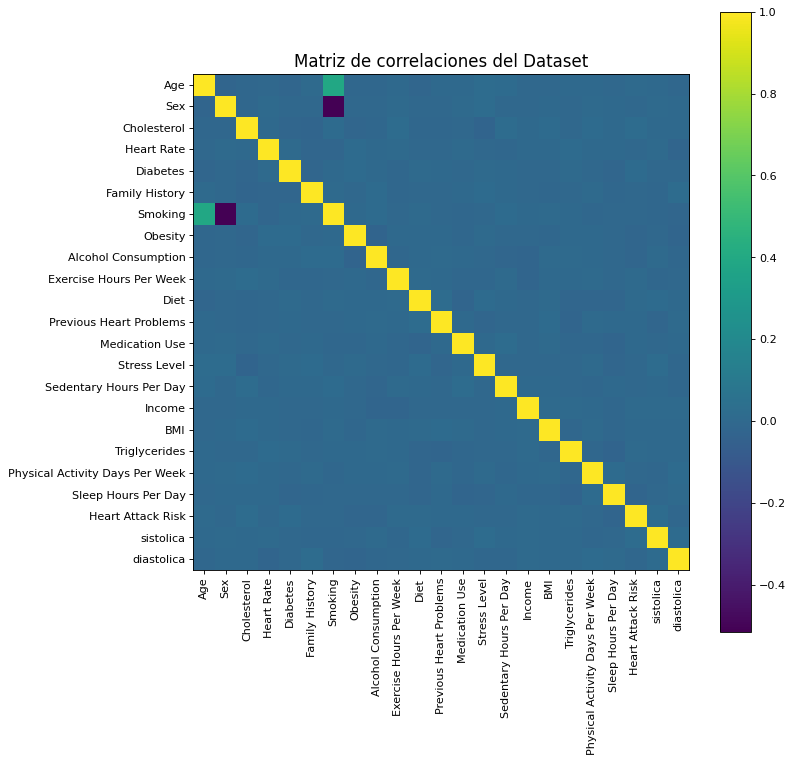

In [16]:
plotCorrelationMatrix(df_depu_numerico, 10)

In [ ]:
Tal como se mencionó anteriormente, no se observa ninguna correlación significativa entre variables que, uno a priori, podría pensarlas como influyentes.


### Hipótesis planteadas

1.   La probabilidad de riesgo cardíaco aumenta con la edad
2.   Los pacientes con colesterol alto tienen mayor riesgo de ataque cardíaco.
3.   Los pacientes con obesidad y una mala dieta deberían aumentar el riesgo a ataque cardíaco a mayor cantidad de horas sedentarias por semana.







```
# This is formatted as code
```

### Análisis del dataframe. Edad - riesgo de ataque vs Edad - no riesgo de ataque

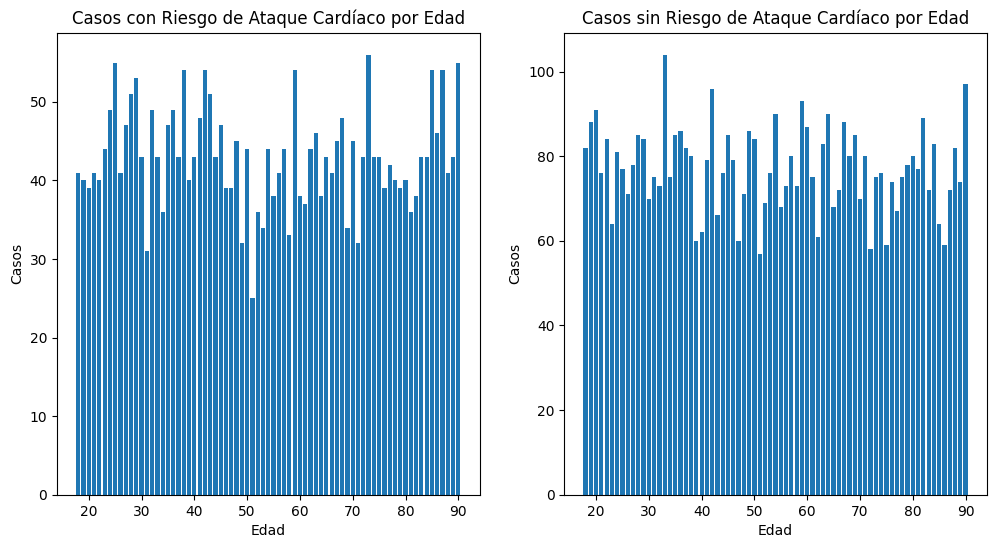

In [19]:


# Se agrupa el dataframe por edad y riesgo
df_edad_riesgo = df_depu.groupby(['Age', 'Heart Attack Risk']).size().reset_index(name='Casos')

# Crear los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Casos con riesgo
df_riesgo = df_edad_riesgo[df_edad_riesgo['Heart Attack Risk'] == 1]
axes[0].bar(df_riesgo['Age'], df_riesgo['Casos'])
axes[0].set_title('Casos con Riesgo de Ataque Cardíaco por Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Casos')

# Gráfico 2: Casos sin riesgo
df_sin_riesgo = df_edad_riesgo[df_edad_riesgo['Heart Attack Risk'] == 0]
axes[1].bar(df_sin_riesgo['Age'], df_sin_riesgo['Casos'])
axes[1].set_title('Casos sin Riesgo de Ataque Cardíaco por Edad')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Casos')

plt.show()

Como se puede observar en los gráficos, se esperaría tener un gráfico en ascenso, donde el riesgo a un ataque cardíaco aumente conforme aumenta la edad. No obstante, no se puede decir que se observe este patrón. De hecho, no parece ser muy distinto al de edad vs no riesgo, el cual se mantiene prácticamente homogéneo, más allá qque hayan más casos de no riesgo que casos de riesgo (proporción 2 a 1).

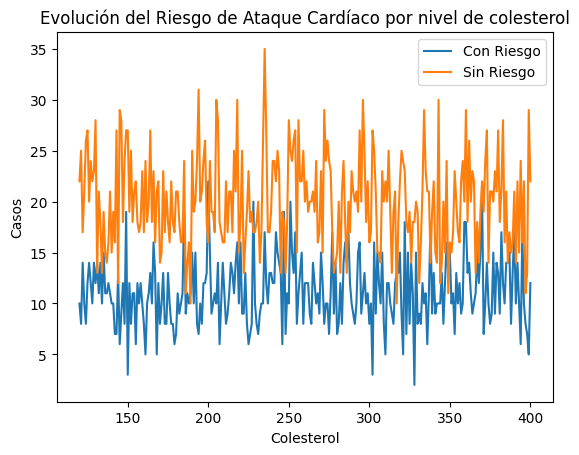

In [22]:
# Se agrupa el dataframe por edad y riesgo
df_col_riesgo = df_depu.groupby(['Cholesterol', 'Heart Attack Risk']).size().reset_index(name='Casos')

# Crear los gráficos
fig, ax = plt.subplots()

# Gráfico 1: Casos con riesgo
df_riesgo = df_col_riesgo[df_col_riesgo['Heart Attack Risk'] == 1]
ax.plot(df_riesgo['Cholesterol'], df_riesgo['Casos'], label='Con Riesgo')


# Gráfico 2: Casos sin riesgo
df_sin_riesgo = df_col_riesgo[df_col_riesgo['Heart Attack Risk'] == 0]
ax.plot(df_sin_riesgo['Cholesterol'], df_sin_riesgo['Casos'], label='Sin Riesgo')

ax.set_title('Evolución del Riesgo de Ataque Cardíaco por nivel de colesterol')
ax.set_xlabel('Colesterol')
ax.set_ylabel('Casos')
ax.legend()

plt.show()

Nuevamente, no se puede diferenciar una curva de la otra en lo referido a colesterol. Pareciera que el nivel de colesterol no incidiera sobre la probablidad de ataque cardíaco, algo que sabemos es mentira. Parece ser que, salvo la proporción de riesgo respecto a no riesgo en la cual no riesgo duplica a los casos de riesgo (se ve algo similar en el gráfico de barras), este dataset parecería haber sido creado con datos falsos.

Como última hipótesis antes de pasar al entrenamiento de la IA, se verá de analizar un caso más, de paciente con obesidad y con mala dieta vs horas de estado sedentario al día, para verificar si aumenta el riesgo vs misma situación y no riesgo.

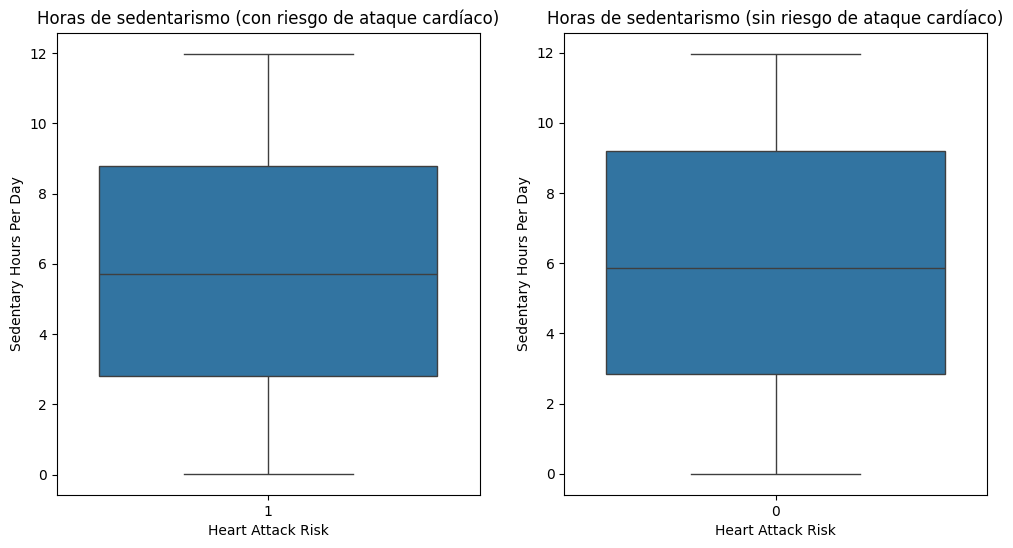

In [26]:
# Filtrar los datos para personas con obesidad y mala dieta
data_filtrada = df_depu[(df_depu['Obesity'] == 1) & (df_depu['Diet'] == 1)]

# Crear los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Con riesgo de ataque cardíaco
sns.boxplot(x='Heart Attack Risk', y='Sedentary Hours Per Day',
            data=data_filtrada[data_filtrada['Heart Attack Risk'] == 1], ax=axes[0])
axes[0].set_title('Horas de sedentarismo (con riesgo de ataque cardíaco)')

# Gráfico 2: Sin riesgo de ataque cardíaco
sns.boxplot(x='Heart Attack Risk', y='Sedentary Hours Per Day',
            data=data_filtrada[data_filtrada['Heart Attack Risk'] == 0], ax=axes[1])
axes[1].set_title('Horas de sedentarismo (sin riesgo de ataque cardíaco)')

plt.show()


Revisando los gráficos de bigote, se puede observar que son idénticos para pacientes sin riesgo que para pacientes con riesgo. Esto tiene una sola explicación. El dataset no tiene información verosímil. Se estima es un dataset fabricado. Teniendo em cuenta esto, se procederá a realizar el análisis de machine learning, aunque se sospecha no tendrá buenos resultados.

Se realizará el set de gráficos de sns para corroborar lo indicado sobre una base de datos fabricada en vez de usar datos reales:

In [27]:
#Gráfico de Correlación
sns.pairplot(df_depu, diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

Se aclara toda duda respecto al dataset. El mismo no puede representar datos reales por la forma de los gráficos encontrada. La misma significa que no hay prácticamente ninguna correlación significativa entre las distintas variables en el mismo.

[link text](https://)### Entrenamiento de modelos de IA

In [34]:
df_depu_numerico

# Se elige el 90 % del dataset para entrenar la IA y el 10% restante para testeo.
train_idx = df_depu_numerico.sample(frac=0.9, random_state=10).index
test_idx = df_depu_numerico.index.difference(train_idx)

# Armado de dataFrames para entrenamiento y testeo
df_train = df_depu_numerico.loc[train_idx]
df_test = df_depu_numerico.loc[test_idx]

# Elimino la columna de resultados del dataset de entrenamiento
# y creo el dataset de resultado (y_train) con dicha columna
X_train = df_train.drop('Heart Attack Risk', axis=1)
Y_train = df_train['Heart Attack Risk']

# Elimino la columna de resultados del dataset de testeo (x_test) para luego poder
#compararlo con la predicción que dé el testeo (y_pred)
X_test = df_test.drop('Heart Attack Risk', axis=1)
Y_test = df_test['Heart Attack Risk']

print("Train dataset:", len(df_train))
print("Test dataset:", len(df_test))

Train dataset: 7887
Test dataset: 876


In [33]:
df_depu_numerico
df_test

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,sistolica,diastolica
26,48,1,271,105,0,1,1,0,1,13.591522,...,4,8.478895,139560,21.582203,316,3,8,0,148,105
44,50,1,190,43,1,1,1,0,0,0.618010,...,5,0.870975,119607,25.769026,679,7,9,0,149,73
49,31,2,192,90,1,0,0,0,1,3.604785,...,1,10.378870,30816,30.148193,366,5,10,1,124,93
58,74,1,285,109,1,1,1,0,1,5.575382,...,1,10.871270,35855,39.783909,682,6,10,0,151,85
59,72,1,377,61,1,1,1,1,0,17.439610,...,9,3.476703,249614,28.514638,106,1,10,1,144,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,70,1,296,53,0,0,1,0,1,6.070162,...,1,5.054156,168698,34.852821,670,1,8,1,131,69
8716,36,1,167,74,1,0,1,1,1,12.846962,...,8,2.850590,104642,28.110502,622,5,10,1,145,70
8728,67,1,282,109,1,1,1,0,0,5.343004,...,8,8.944291,70024,21.743205,437,7,5,0,133,106
8747,24,1,396,45,0,0,1,1,1,0.374287,...,10,11.467868,219922,38.436301,51,1,8,1,118,89


### Entrenamiento de algoritmo de IA de tipo Árbol de decisión:

Se utiliza este algoritmo por su eficiencia a la hora de tratar con variables categóricas, copmo es el caso en la mayoría de las features del dataset correspondiente a las comorbilidades.

In [35]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Para realizar este entrenamiento recupero la variable x_train
# (que es el dataset a utilizar) y también el y_train que es la variable
# resultado para entrenar el modelo.

# Crear un modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=10)

# Entrenamiento del modelo
model.fit(X_train, Y_train)


# El modelo procede a predecir dentro del conjunto de casos
# seleccionado para el testeo
Y_pred = model.predict(X_test)

# Verificación del entrenamiento del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo:", accuracy)

# Hacer predicciones en el conjunto de prueba
Y_pred = model.predict(X_test)



Precisión del modelo: 0.6415525114155252


El bajo resultado arrojado en relación a la precisión de este modelo nos da la pauta de que pueden haber faltado variables importantes que no se tuvieron en cuenta por ser del tipo categóricas.

### Matriz de confusión:

Se realizará a continuación una matriz de confusión, la que cual se usa para ver la cantidad de casos que cayó en cada uno de los 4 estados posibles. Los mismos son:

    1) Verdadero Positivo: Cuando la IA predice como Positivo un dato que, en realidad, es Positivo.
    2) Verdadero Negativo: Cuando la IA predice como Negativo un dato que, en realidad, es Negativo.
    3) Falso Positivo: Cuando la IA predice como Positivo un dato que en realidad, es Negativo. Este es un caso no deseable aunque no siempre es el peor escenario. Que un test indique que tengo una enfermedad y me den antibióticos no debería ser algo relativamente malo para la salud de uno.
    4) Falso Negativo: Cuando la IA predice como Negativo un valor que, en realidad, es Positivo. Este sería el peor escenario posible, puesto que el resultado negativo frente a una enfermedad que efectivamente tengo haría imposible comenzar con las medidas para contrarrestar la misma, complicando el panorama al corto plazo.  

In [36]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['Negativo (P)', 'Positivo (P)'],
                yticklabels=['Negativo', 'Positivo'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['Negativo (P)', 'Positivo (P)'],
                yticklabels=['Negativo', 'Positivo'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

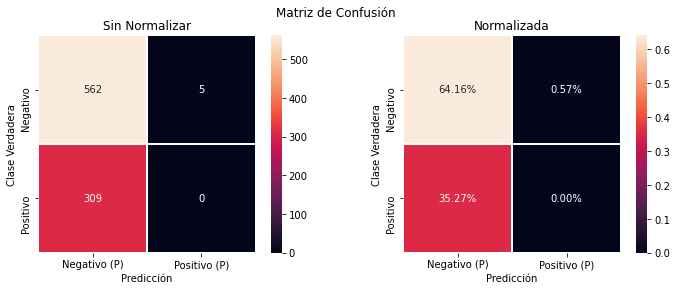

In [ ]:
matriz_confusion(Y_test, Y_pred)

Tal como se muestran en las figuras anteriores, podemos entender que hubieron 562 casos en los cuales el modelo acertó con negativo para aquellos que debían ser tomados como tal. Sin embargo, encontramos un numero elevado en la totalidad de casos que debían ser tomados como positivos y el modelo los rotuló como negativos. Es decir, se trata de casos que tenian riesgo de ataque cardíaco y el modelo dijo que no existía tal riesgo para esos casos.


In [ ]:
# Se procede a ejecutar un algoritmo de vectores para clasificar datos que nos permita ver qué dio mejor resultado

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Se recupera la misma muestra que para los casos anteriores para comparar resultados

X1 = df_depu_numerico.drop('Heart Attack Risk', axis=1)
Y1 = df_depu_numerico['Heart Attack Risk']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)

In [ ]:
model1 = SVC(kernel='linear')
model1.fit(X1_train, Y1_train)
Y1_pred = model1.predict(X1_test)

accuracy = accuracy_score(Y1_test, Y1_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6474614945807188


Luego de ver el resultado anterior comprendemos que el modelo arroja un numero similar a los que nos dieron los modelos anteriores. Lo cual nos hace suponer que el problema está en el dataset elegido.


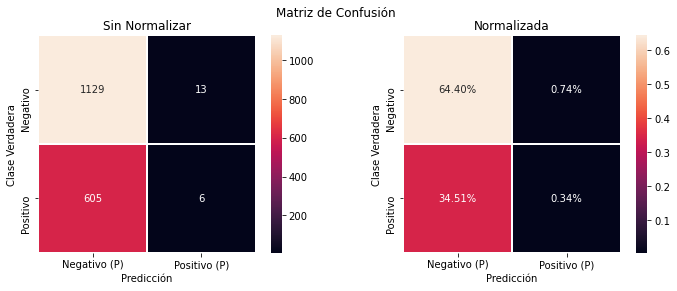

In [ ]:
matriz_confusion(Y1_test, Y1_pred)

Nuevamente, la matriz de confusión nos devuelve un numero grande de verdaderos negativos pero también nos trae un número considerable de casos positivos que rotuló como negativos.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que df_depu_numerico ya está cargado
X = df_depu_numerico.drop('Heart Attack Risk', axis=1)  # Características
y = df_depu_numerico['Heart Attack Risk']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba (aunque el dataset es pequeño)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.23076529113894798


In [48]:
y_pred_binario = np.where(y_pred >= 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6417569880205363


In [ ]:
Seguimos obteniendo entonces una precisión muy similiar a los analisis anteriores.


In [ ]:
df_depu_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

Del cuadro anterior revisamos nuevamente qué columnas hay y se procede a clasificar sistólica y diastólica en forma númera para poder procesar esos datos.


In [44]:
def clasificar_presion(df):
    conditions = [
        (df['sistolica'] < 120) & (df['diastolica'] < 80),
        (df['sistolica'].between(120, 129)) & (df['diastolica'] < 80),
        (df['sistolica'].between(130, 139)) & (df['diastolica'].between(80, 89)),
        (df['sistolica'] >= 140) | (df['diastolica'] >= 90)
    ]
    choices = [1, 2, 3, 4]
    df['clasificacion'] = np.select(conditions, choices, default=0)
    return df
df_muydepu = clasificar_presion(df_depu)
df_muydepu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [45]:
df_muydepu = df_muydepu.drop('sistolica', axis = 1)
df_muydepu = df_muydepu.drop('diastolica', axis = 1)
df_muydepu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   int64  
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

De esta manera queda configurada la columna "clasificación" y se borran las columnas de sistólica y diastólica.
A continuación, se procede a utilizar el modelo de Regresión Lineal pero aplicado a todas las columnas.


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Utilizo el DataFrame 'df_depu_numerico' con columnas binarias, numéricas y 'Heart Attack Risk'

# Identifico columnas numéricas, categóricas y la variable objetivo
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'clasificacion']  # Ajusta según tus columnas numéricas
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Country', 'Continent', 'Hemisphere']  # Ajusta según tus columnas categóricas
target_column = 'Heart Attack Risk'

# Transformación
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combino variables numéricas y categóricas
# transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creación de pipeline completo (preprocesamiento + modelo)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Divido los datos en entrenamiento y prueba
X = df_muydepu.drop(target_column, axis=1)
y = df_muydepu[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = pipeline.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo (regresión lineal)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

y_pred_binario = np.where(y_pred >= 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binario)
print("Precisión del modelo:", accuracy)


Error cuadrático medio: 0.23236654485489258
Precisión del modelo: 0.6423274386765545


Nuevamente, obtenemos un resultado similar a los modelos anteriores en cuanto a precisión del modelo.

Conclusiones
Basado en los resultados obtenidos utilizando algoritmos de machine learning como SVC, regresión lineal, matriz de confusión y árboles de decisión, y considerando la falta de correlación entre variables como obesidad, sedentarismo, dieta no saludable y colesterol con el riesgo de ataque cardíaco, se puede concluir que el dataset utilizado contiene datos de baja calidad o inventados. Los datos utilizados en el análisis parecen no ser lo suficientemente precisos para establecer relaciones significativas entre las variables estudiadas. Es posible que hayan sido creados, o que falten variables relevantes, que existan errores en la medición o que la muestra no sea representativa de la población en general.

En resumen, los resultados obtenidos indican que los datos utilizados no son adecuados para construir un modelo predictivo confiable del riesgo de ataque cardíaco basado en las variables analizadas.
